
# **PRIOR PREDICTION OF NEURODEGENERATIVE DISEASE: PARKINSON’S DISEASE**


In [ ]:
!pip install sklearn
import numpy as np
import pandas as pd
import warnings
import imblearn
import seaborn as sb
from sklearn import svm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler
from math import sqrt
from scipy.stats import mode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9fa6ab93f8d632e96c983bd3b20355dfa6a763f959eff7448f6227bdd097a205
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
data=pd.read_csv("parkinsons.txt")
X = data.loc[:,~data.columns.isin(['name','status'])]
y = data.loc[:,'status']
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


###Train Test split before working on data
 

In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_b=X #for data without any preprocessing 
y_b=y

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.info(),
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

(195, 24)

In [ ]:
print(data.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


## DATA VISUALIZATION

### UNIVARIATE ANALYSIS

The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundamental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

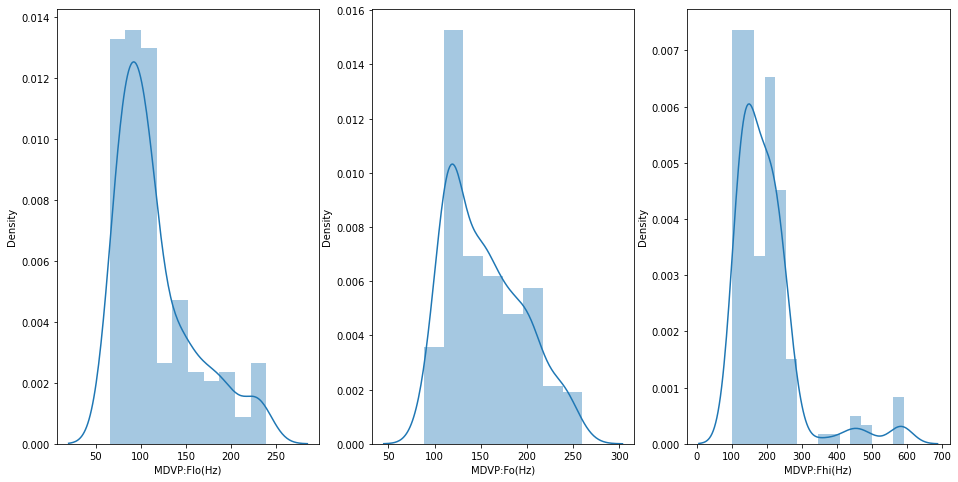

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sb.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sb.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sb.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

The measure of variation in amplitude is positively skewed.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

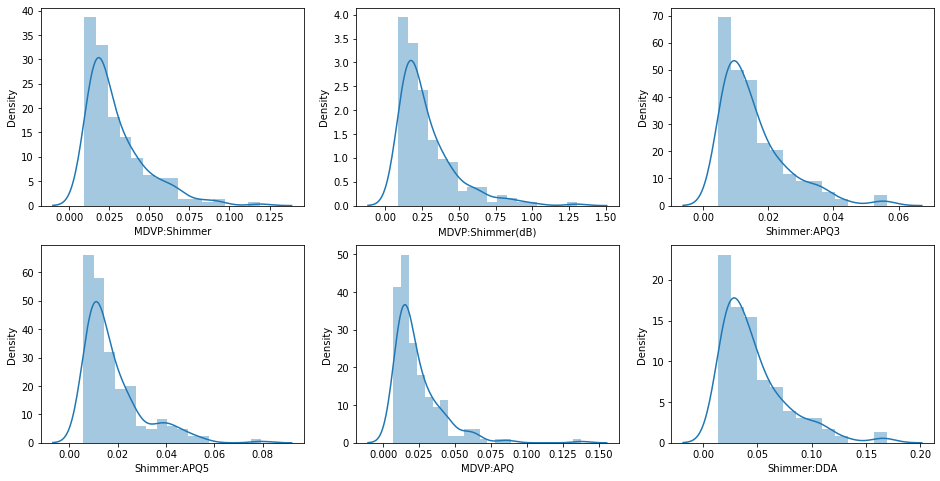

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sb.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sb.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sb.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sb.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sb.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sb.distplot(data['Shimmer:DDA'],ax=ax[1,2])

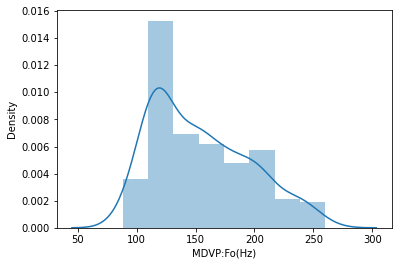

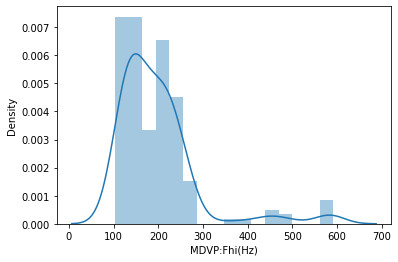

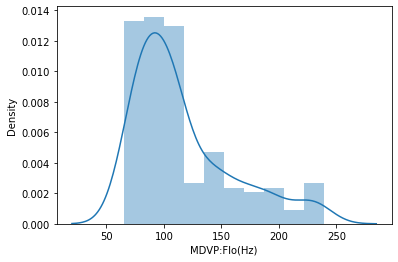

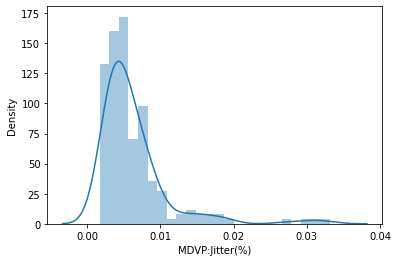

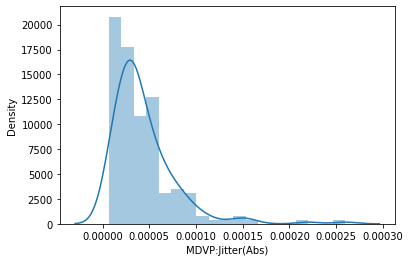

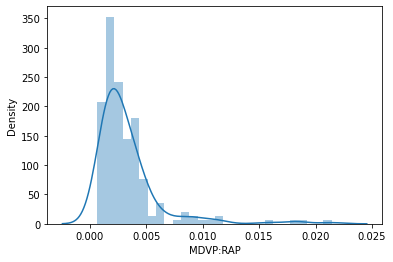

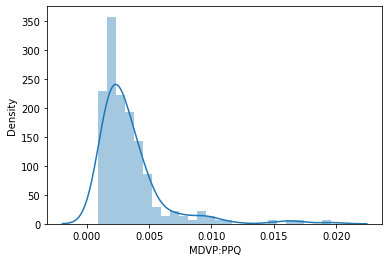

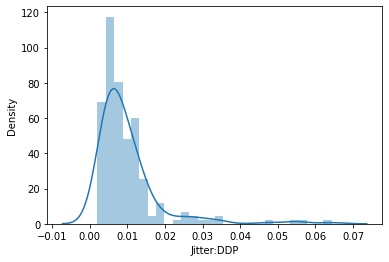

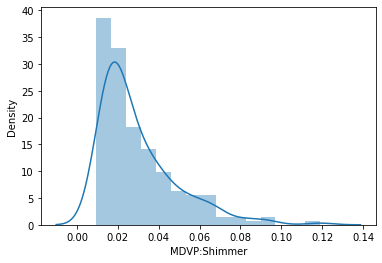

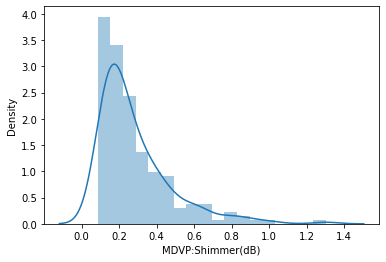

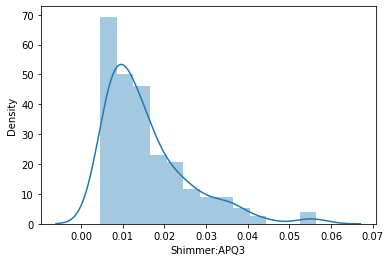

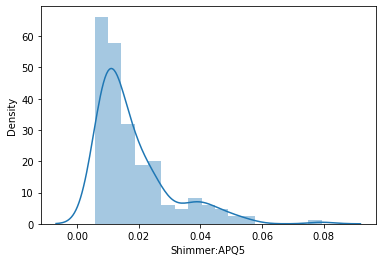

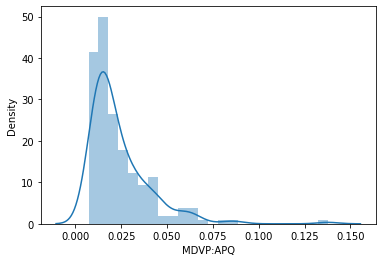

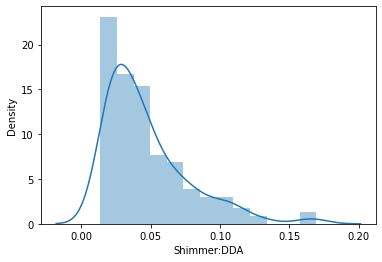

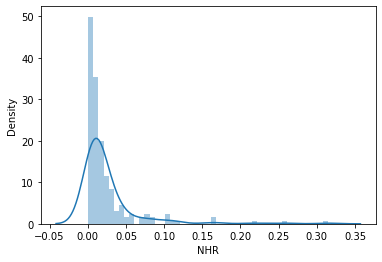

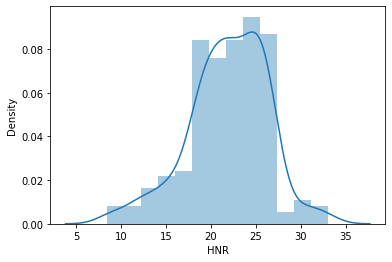

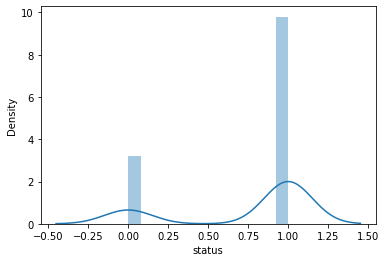

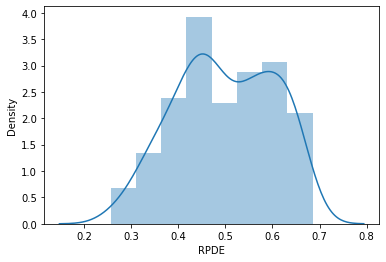

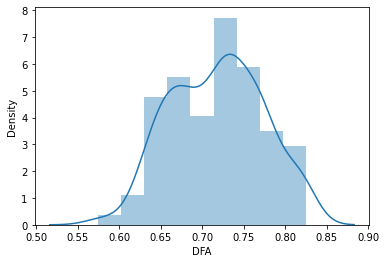

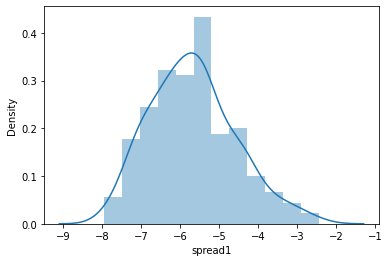

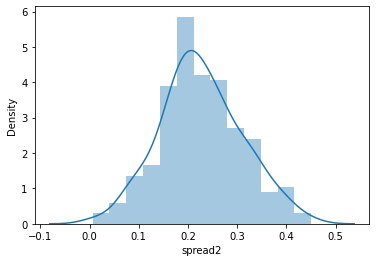

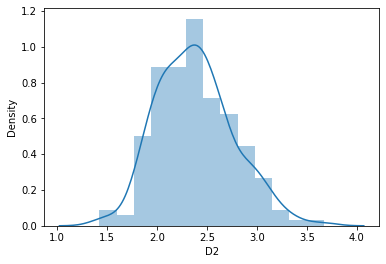

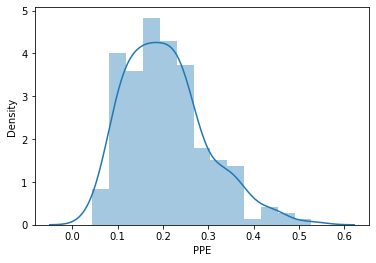

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

def distributionData(col):
  sb.distplot(data[col])
  plt.show()

for i in list(data.columns)[1:]:
  distributionData(i)

By this graph we can analyse that the range of value for few feature are quite large and have greater standard deviation.Also whether the given feature is a normal distribution or is positively skewed and negatively skewed normal distribution.

<ipython-input-10-12e4afd05069>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-10-12e4afd05069>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-10-12e4afd05069>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


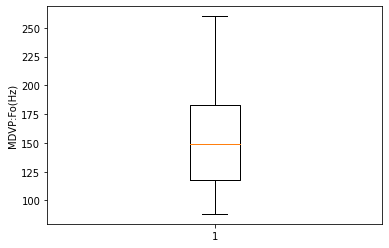

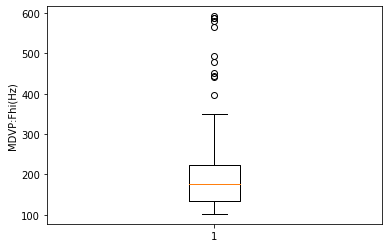

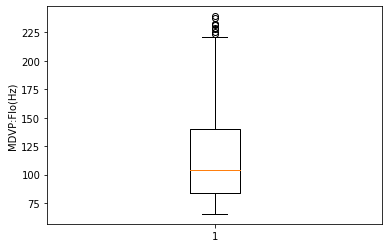

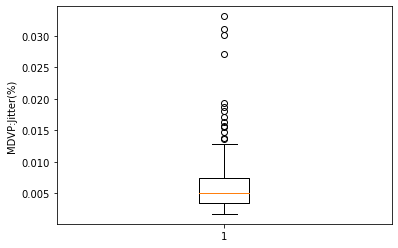

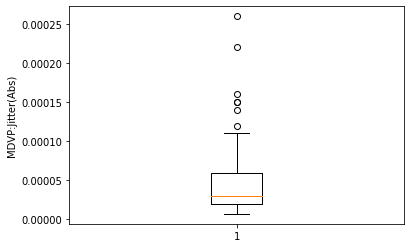

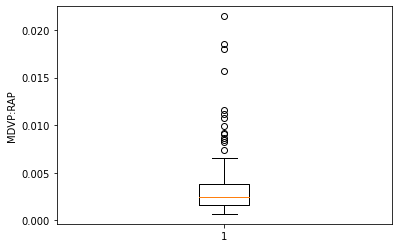

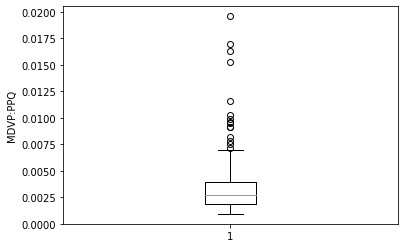

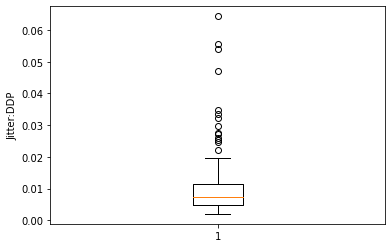

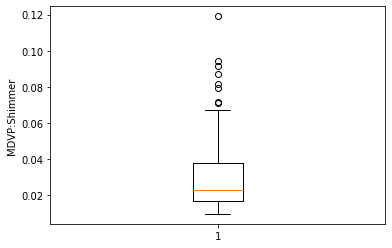

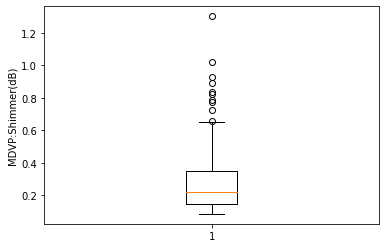

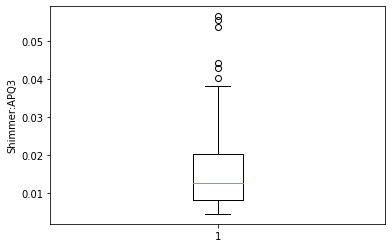

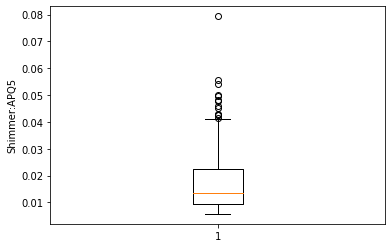

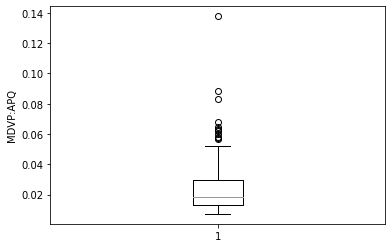

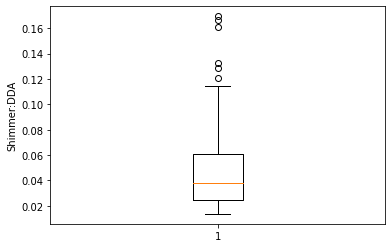

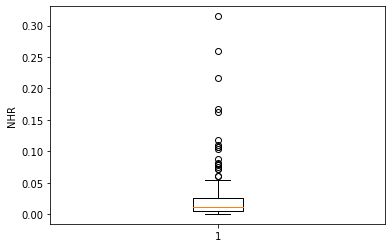

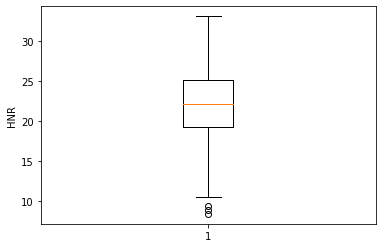

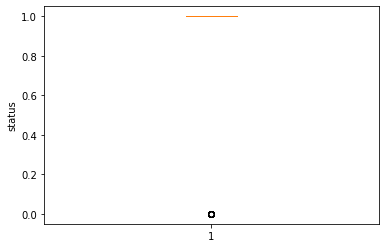

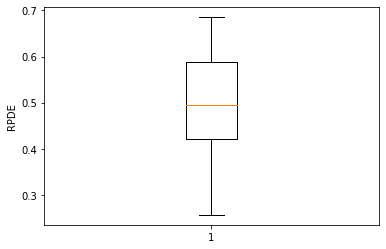

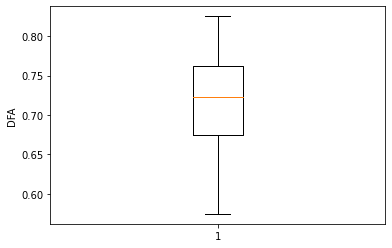

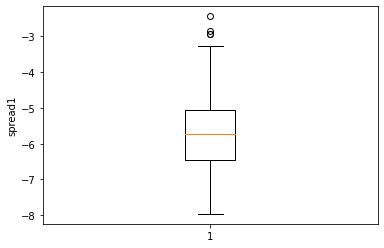

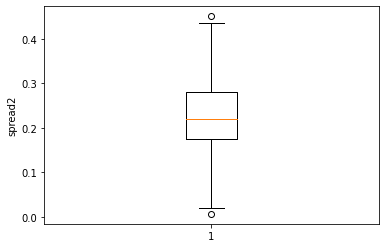

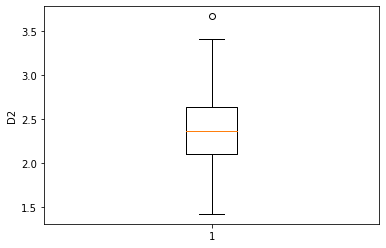

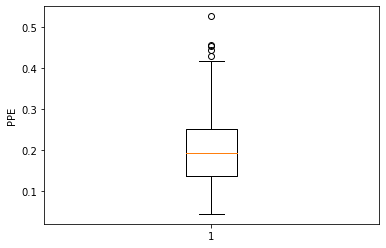

In [ ]:
for i in data.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(data[i])
    plt.ylabel(i)

### **BIVARIATE ANALYSIS**

The distribution plots depicts the skewedness of the features in the data.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2680: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(a, bins, orientation=orientation,
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


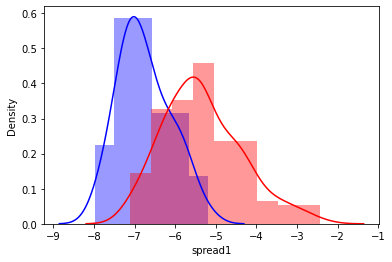

In [ ]:
sb.distplot( data[data.status == 0]['spread1'], color = 'B')
sb.distplot( data[data.status == 1]['spread1'], color = 'r')

In [ ]:
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


The boxplot displays the interquartile range of various features with respect to each of the healthy and PD person.

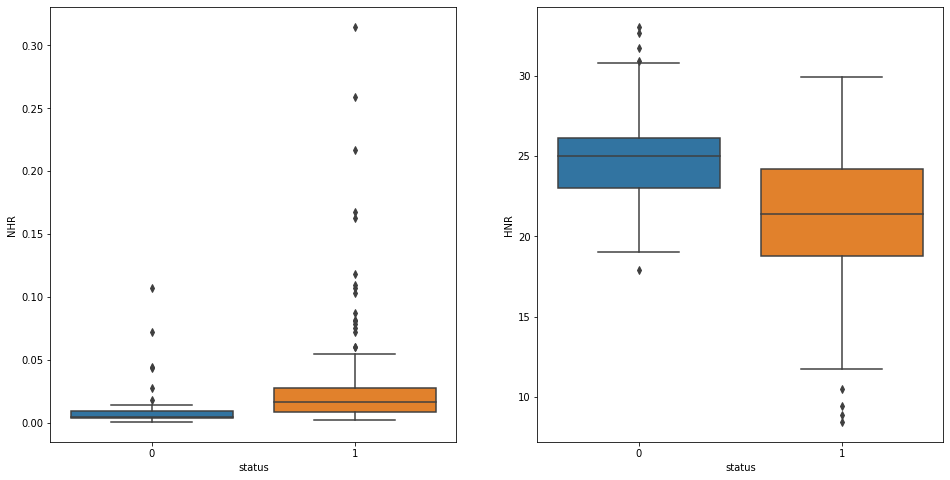

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sb.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sb.boxplot(x='status',y='HNR',data=data,ax=ax[1])

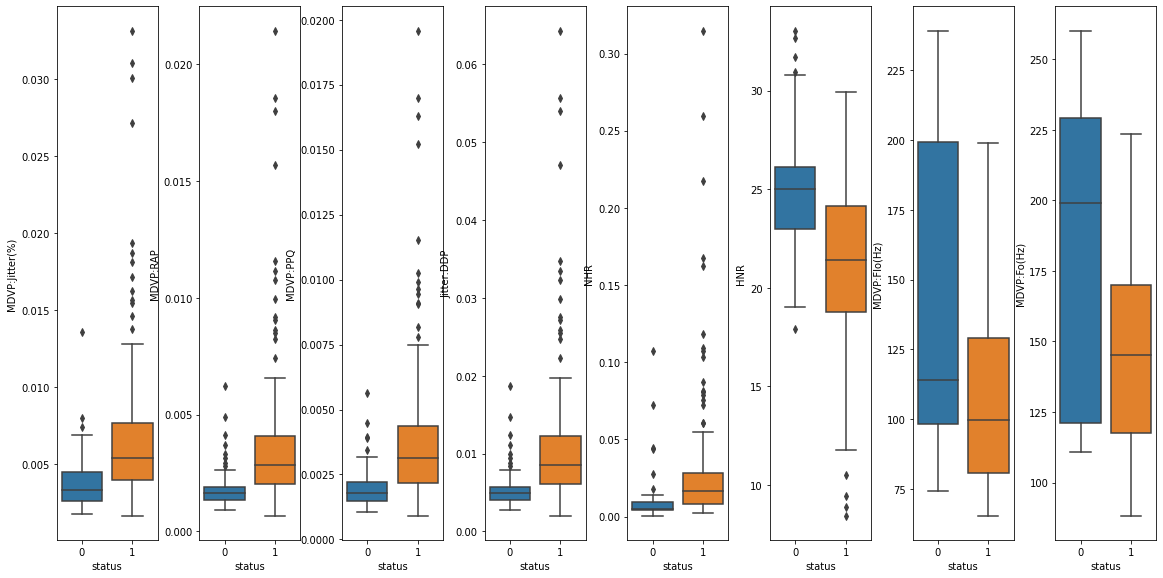

In [ ]:
cols = ["MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","NHR","HNR","MDVP:Flo(Hz)","MDVP:Fo(Hz)"]
fig, axs = plt.subplots(ncols = 8,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sb.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

In [ ]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values
print(features,labels)

[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


## DATA PREPROCESSING

### BALANCING

1    147
0     48
Name: status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


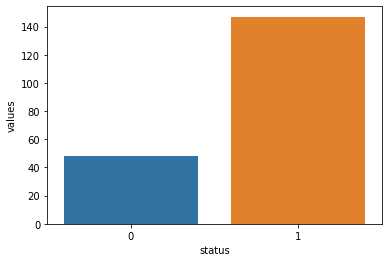

In [ ]:
# status - Health status of the subject: 1 - Parkinson's, 0 - healthy 
temp = data["status"].value_counts()
print(temp)

status_graph = pd.DataFrame({"status": temp.index, "values": temp.values})
print(sb.barplot(x = "status", y = "values", data = status_graph)) 

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1    147
0    147
Name: status, dtype: int64

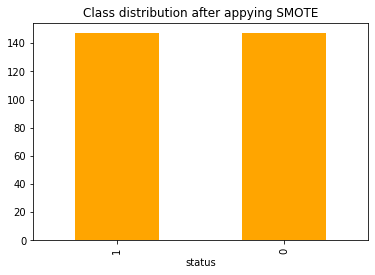

In [ ]:
pd.Series(y).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='status',color='orange')


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.463544,0.598705,-0.177157,-0.424211,-0.109102,-0.153267,-0.109154,-0.158218,-0.131289,...,-0.173619,-0.137301,-0.053305,0.092460,-0.389981,-0.560500,-0.502437,-0.438726,0.064226,-0.466535
MDVP:Fhi(Hz),0.463544,1.000000,0.098753,0.094657,-0.051011,0.114309,0.099444,0.114248,0.011979,0.052948,...,-0.009780,0.018451,0.175058,-0.077240,-0.117838,-0.426580,-0.115850,-0.119398,0.189844,-0.114058
MDVP:Flo(Hz),0.598705,0.098753,1.000000,-0.249085,-0.359649,-0.196810,-0.198711,-0.196784,-0.226694,-0.204885,...,-0.198590,-0.227621,-0.201647,0.330241,-0.375680,-0.130746,-0.450237,-0.292987,-0.256235,-0.400813
MDVP:Jitter(%),-0.177157,0.094657,-0.249085,1.000000,0.940295,0.986804,0.972755,0.986813,0.779598,0.816080,...,0.770877,0.760742,0.922563,-0.736617,0.375682,0.058698,0.682094,0.387462,0.487103,0.710195
MDVP:Jitter(Abs),-0.424211,-0.051011,-0.359649,0.940295,1.000000,0.920055,0.900085,0.920072,0.736085,0.746905,...,0.696454,0.725797,0.849957,-0.670740,0.462110,0.162740,0.750197,0.444909,0.391729,0.765376
MDVP:RAP,-0.109102,0.114309,-0.196810,0.986804,0.920055,1.000000,0.962917,1.000000,0.780445,0.812898,...,0.759184,0.767916,0.931020,-0.728498,0.348621,0.009311,0.649220,0.319652,0.484709,0.674762
MDVP:PPQ,-0.153267,0.099444,-0.198711,0.972755,0.900085,0.962917,1.000000,0.962920,0.812553,0.854884,...,0.822539,0.781601,0.864855,-0.733326,0.351370,0.130494,0.715599,0.407237,0.472346,0.763902
Jitter:DDP,-0.109154,0.114248,-0.196784,0.986813,0.920072,1.000000,0.962920,1.000000,0.780410,0.812861,...,0.759156,0.767888,0.931045,-0.728463,0.348519,0.009294,0.649187,0.319620,0.484675,0.674746
MDVP:Shimmer,-0.158218,0.011979,-0.226694,0.779598,0.736085,0.780445,0.812553,0.780410,1.000000,0.987773,...,0.954087,0.989133,0.718494,-0.819238,0.473862,0.113813,0.687953,0.449099,0.542896,0.723329
MDVP:Shimmer(dB),-0.131289,0.052948,-0.204885,0.816080,0.746905,0.812898,0.854884,0.812861,0.987773,1.000000,...,0.964595,0.966168,0.748399,-0.816919,0.437016,0.114600,0.679158,0.446223,0.550778,0.717439


### MULTICOLLINEARITY CHECK

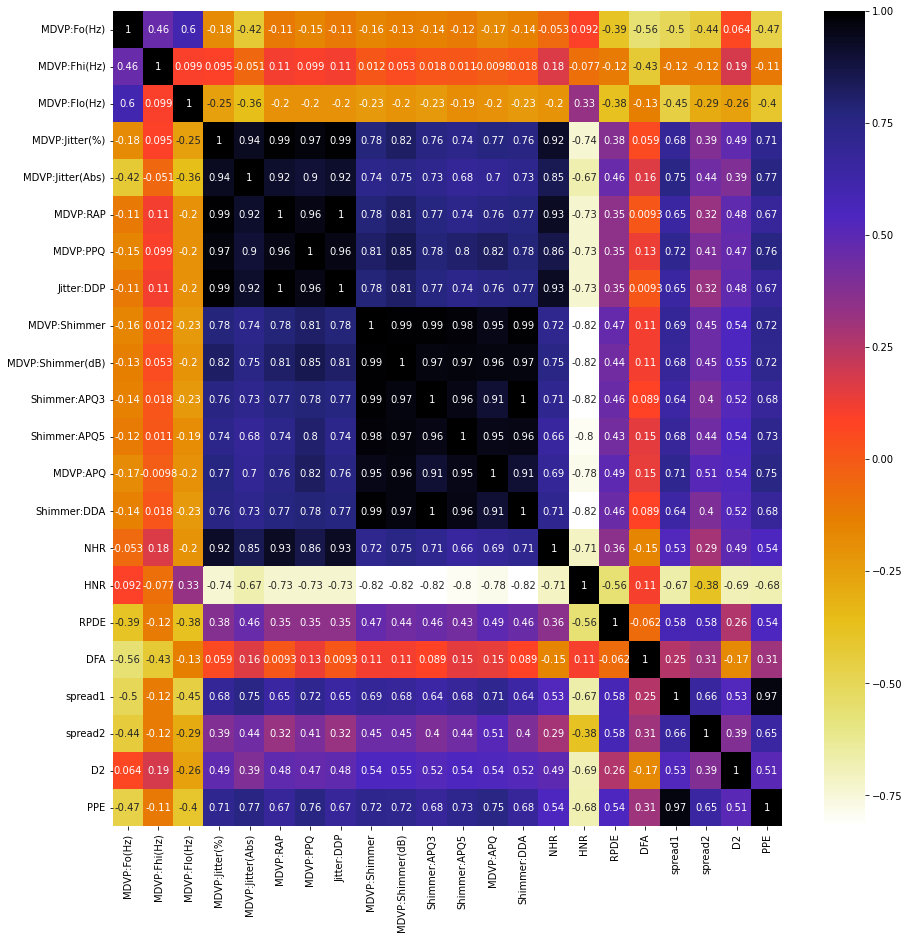

In [ ]:
#using pearson correlation
plt.figure(figsize=(15,15))
cor=X_train.corr()
sb.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(X_T,threshold):
  column_cor=set()
  corr_matrix=X_T.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        column_name=corr_matrix.columns[i]
        column_cor.add(column_name)
  return column_cor 

In [ ]:
corr_features=correlation(X_train,0.90)
len(set(corr_features))

11

DATA REDUCTION

In [ ]:
corr_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [ ]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
X=X.drop(corr_features,axis=1)
X_train
X_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
33,202.266000,211.604000,197.079000,0.001800,0.009540,32.684000,0.368535,0.742133,-7.695734,0.178540,1.544609
9,95.056000,120.103000,91.226000,0.005320,0.028380,21.862000,0.547037,0.798463,-5.011879,0.325996,2.432792
146,169.774000,191.759000,151.451000,0.015680,0.081430,12.359000,0.561610,0.793509,-3.297668,0.414758,3.413649
282,200.665939,210.189169,194.417040,0.002133,0.011301,31.449324,0.375727,0.742494,-7.743743,0.171302,2.324300
261,232.707660,250.071368,220.739482,0.002996,0.016272,24.778355,0.305666,0.665303,-7.397197,0.061836,2.082938
125,145.174000,198.109000,80.637000,0.007330,0.023620,18.857000,0.637518,0.735546,-5.594275,0.127950,1.765957
108,151.989000,157.339000,132.857000,0.001740,0.010240,29.928000,0.311369,0.676066,-6.739151,0.160686,2.296873
206,241.060300,248.402374,232.211223,0.002829,0.017164,23.274193,0.451568,0.633631,-6.812455,0.159786,2.222649
109,193.030000,208.900000,80.297000,0.007660,0.030440,21.934000,0.497554,0.740539,-5.845099,0.278679,2.608749
42,237.226000,247.326000,225.227000,0.002980,0.017520,22.736000,0.305062,0.654172,-7.310550,0.098648,2.416838


In [ ]:
y_train
y_test

33     0
9      1
146    1
282    0
261    0
125    1
108    1
206    0
109    1
42     0
82     1
46     0
164    1
56     1
116    1
225    0
59     1
185    0
210    0
5      1
273    0
248    0
219    0
113    1
272    0
90     1
60     0
180    1
275    0
79     1
203    0
126    1
264    0
147    1
45     0
124    1
63     0
218    0
292    0
291    0
84     1
286    0
25     1
75     1
277    0
173    0
278    0
195    0
30     0
22     1
242    0
24     1
154    1
76     1
93     1
139    1
17     1
119    1
230    0
Name: status, dtype: int64

## FEATURE SCALING


In [ ]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# MODEL TRAINING AND IMPLEMENTATION

## Training by XGBoost

In [ ]:
from xgboost import XGBClassifier
xb = XGBClassifier().fit(X_train, y_train)
predictions = xb.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print(cm)
a1=accuracy_score(y_test, predictions) * 100
a1

[[28  2]
 [ 0 29]]


96.61016949152543

In [ ]:
a=f1_score(y_test, predictions)
a

0.9666666666666666

In [ ]:
X_train[0]

array([-0.35776147, -0.49522796,  0.3660383 , -0.3585994 , -0.45759892,
        0.04470544, -0.74536962,  1.13665775,  0.35696984,  0.16022223,
        1.02029197])

## Training by KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy, Confusion Matrix and F1 Score

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a2=accuracy_score(y_test, y_pred)*100
a2

[[30  0]
 [ 0 29]]


100.0

In [ ]:
b=f1_score(y_test, y_pred)
b

1.0

## Training by kernel SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

Accuracy, Confusion Matrix and F1 Score

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a3=accuracy_score(y_test, y_pred)*100
a3

[[28  2]
 [ 1 28]]


94.91525423728814

In [ ]:
c=f1_score(y_test, y_pred)
c

0.9491525423728815



## Training by Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy, Confusion Matrix and F1 Score

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a4=accuracy_score(y_test, y_pred) * 100
a4

[[30  0]
 [ 1 28]]


98.30508474576271

In [ ]:
d=f1_score(y_test, y_pred)
d

0.9824561403508771

##Training by Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy, Confusion Matrix and F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a5=accuracy_score(y_test, y_pred)*100
a5

[[29  1]
 [ 1 28]]


96.61016949152543

In [ ]:
e=f1_score(y_test, y_pred)
e

0.9655172413793104

##Training by Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Accuracy, Confusion Matrix and F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a6=accuracy_score(y_test, y_pred)*100
a6

[[24  6]
 [ 4 25]]


83.05084745762711

In [ ]:
f=f1_score(y_test, y_pred)
f

0.8333333333333334

##Training by Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Accuracy, Confusion Matrix and F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a7=accuracy_score(y_test, y_pred)*100
a7

[[28  2]
 [ 4 25]]


89.83050847457628

In [ ]:
g=f1_score(y_test, y_pred)
g

0.8928571428571429

##Training by SVM

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Accuracy, Confusion Matrix and F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a8=accuracy_score(y_test, y_pred)*100
a8

[[29  1]
 [ 3 26]]


93.22033898305084

In [ ]:
h=f1_score(y_test, y_pred)
h

0.9285714285714286

## Joint accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimator_list = [
    ('knn',knn),
    ('svm',svm),
    ('rf',rf),
    ('xgb',xb) ]
# ]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
y_pred=stack_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
aa=accuracy_score(y_test, y_pred) * 100
aa

[[27  3]
 [ 0 29]]


94.91525423728814

In [ ]:
arr=sc.transform([[155.078,163.736,144.148,0.00168,0.01064,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924]]) 
print(stack_model.predict(arr))

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##Graph of Accuracy & F1 score of all algo

In [ ]:
y_axis=np.array([a1,a2,a3,a4,a5,a6,a7,a8])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'ACCURACY of different Classification Algorithms')

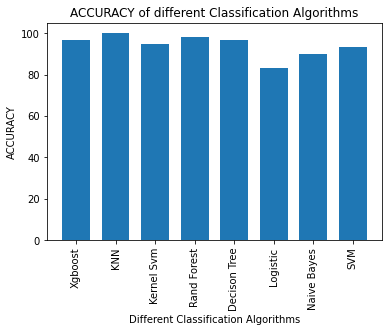

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("ACCURACY")
plt.title("ACCURACY of different Classification Algorithms")

In [ ]:
y_axis=np.array([a,b,c,d,e,f,g,h])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'F1-Score of different Classification Algorithms')

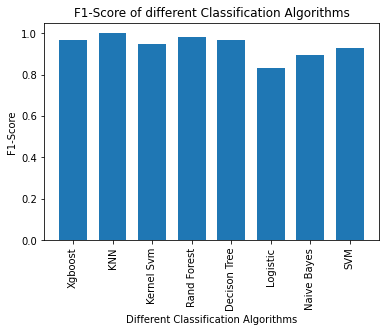

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score of different Classification Algorithms")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Accuracy of different Classification Algorithms on Raw Data')

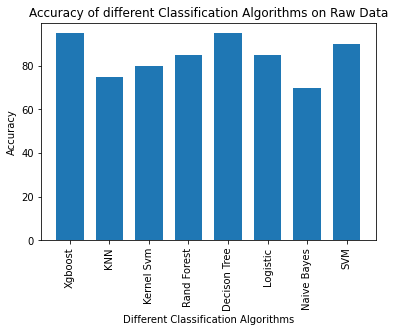

In [ ]:

xb = XGBClassifier().fit(X_train_b, y_train_b)
predictions = xb.predict(X_test_b)
a1=accuracy_score(y_test_b, predictions) * 100

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_b, y_train_b)
y_pred = knn.predict(X_test_b)
a2=accuracy_score(y_test_b, y_pred) * 100

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train_b, y_train_b)
y_pred = svm.predict(X_test_b)
a3=accuracy_score(y_test_b, y_pred)*100

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_b, y_train_b)
y_pred = rf.predict(X_test_b)
a4=accuracy_score(y_test_b, y_pred) * 100

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a5=accuracy_score(y_test_b, y_pred)*100

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a6=accuracy_score(y_test_b, y_pred)*100



classifier = GaussianNB()
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a7=accuracy_score(y_test_b, y_pred)*100


classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a8=accuracy_score(y_test_b, y_pred)*100
y_axis=np.array([a1,a2,a3,a4,a5,a6,a7,a8])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different Classification Algorithms on Raw Data")

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import KFold
import itertools

In [ ]:

folds = range(2,21)

models = np.array([KNeighborsClassifier(),SVC(),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),SVC()])
temp = np.array(["KNN","Kernel Svm","Random Forest","Xgboost","Decision Tree","Logistic","Naive Bayes","SVM"])

In [ ]:

for i, name_of_algo in zip(models, temp):
    print("")
    print(name_of_algo)
    print("")

    for k in folds:
    
      cv = KFold(n_splits=k, shuffle=True, random_state=10)

      model = i

      if name_of_algo == "Kernel Svm":
        model = SVC(kernel = 'rbf')

      if name_of_algo == "SVM":
        model = SVC(kernel = 'linear')
      
      if name_of_algo == "Logistic":
        model = LogisticRegression(solver='lbfgs', max_iter=1000)

      scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

      
      k_mean, k_min, k_max = mean(scores), scores.min(), scores.max()

    
      print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))


KNN

-> folds=2, accuracy=0.912 (0.912,0.912)
-> folds=3, accuracy=0.912 (0.908,0.918)
-> folds=4, accuracy=0.932 (0.904,0.959)
-> folds=5, accuracy=0.905 (0.879,0.949)
-> folds=6, accuracy=0.915 (0.898,0.939)
-> folds=7, accuracy=0.908 (0.857,0.952)
-> folds=8, accuracy=0.918 (0.861,0.946)
-> folds=9, accuracy=0.908 (0.818,0.970)
-> folds=10, accuracy=0.918 (0.828,0.967)
-> folds=11, accuracy=0.925 (0.846,1.000)
-> folds=12, accuracy=0.914 (0.833,0.960)
-> folds=13, accuracy=0.921 (0.818,1.000)
-> folds=14, accuracy=0.922 (0.810,0.952)
-> folds=15, accuracy=0.921 (0.842,1.000)
-> folds=16, accuracy=0.921 (0.833,1.000)
-> folds=17, accuracy=0.921 (0.765,1.000)
-> folds=18, accuracy=0.921 (0.812,1.000)
-> folds=19, accuracy=0.921 (0.800,1.000)
-> folds=20, accuracy=0.921 (0.786,1.000)

Kernel Svm

-> folds=2, accuracy=0.895 (0.878,0.912)
-> folds=3, accuracy=0.901 (0.867,0.939)
-> folds=4, accuracy=0.918 (0.904,0.946)
-> folds=5, accuracy=0.915 (0.831,0.949)
-> folds=6, accuracy=0.912 

In [ ]:
cv2 = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=20)
cv2 = np.mean(cv2)
cv2

0.8776190476190477

In [ ]:
model = SVC(kernel = 'rbf')
cv3 = cross_val_score(model, X, y, scoring='accuracy', cv=20)
cv3 = np.mean(cv3)
cv3

0.8911904761904761

In [ ]:
cv4 = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=18)
cv4 = np.mean(cv4)
cv4

0.9528186274509804

In [ ]:
cv1 = cross_val_score(XGBClassifier(), X, y, scoring='accuracy', cv=18)
cv1 = np.mean(cv1)
cv1

0.9562908496732025

In [ ]:
cv5 = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=19)
cv5 = np.mean(cv5)
cv5

0.9120614035087719

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv6 = cross_val_score(model, X, y, scoring='accuracy', cv=10)
cv6 = np.mean(cv6)
cv6

0.8028735632183908

In [ ]:
cv7 = cross_val_score(GaussianNB(), X, y, scoring='accuracy',cv=12)
cv7 = np.mean(cv7)
cv7

0.7790277777777779

In [ ]:
model = SVC(kernel = 'linear')
cv8 = cross_val_score(model, X, y, scoring='accuracy', cv=5)
cv8 = np.mean(cv8)
cv8

0.7928112215078902

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(X_train)

(294, 11) (235, 11) (59, 11)
[[-0.35776147 -0.49522796  0.3660383  ...  0.35696984  0.16022223
   1.02029197]
 [-0.94254843 -0.85001679 -0.21662893 ... -0.301768    0.40291262
  -0.77003514]
 [ 0.71480625  0.1472964  -0.68340148 ...  0.32562297 -0.51604483
   1.59391182]
 ...
 [-0.21325849 -0.46502708  0.41010313 ... -0.86628206 -0.25403142
  -0.52973882]
 [ 1.55433563  0.45292867 -0.44485406 ... -0.72090609 -0.47288609
  -0.24146289]
 [-0.55953272  4.33928809 -1.18834344 ...  2.68879628  0.87263538
   1.05340002]]


In [ ]:
y_axis = np.array([cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8])
x_axis = np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'Accuracy of different Classification Algorithms After Cross Validation')

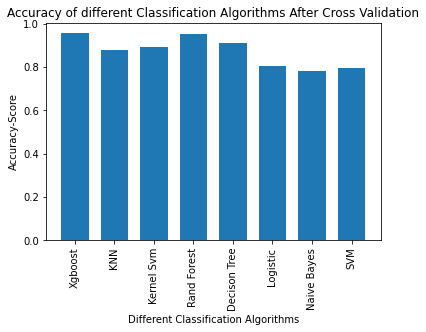

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=0.7);
plt.xticks(rotation = 90)

plt.xlabel("Different Classification Algorithms")
plt.ylabel("Accuracy-Score")
plt.title("Accuracy of different Classification Algorithms After Cross Validation")

Text(0.5, 1.0, 'Accuracy of different Classification Algorithms After Cross Validation')

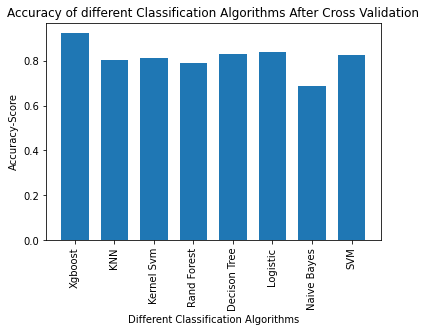

In [ ]:

cv1 = cross_val_score(XGBClassifier(), X_b, y_b, scoring='accuracy', cv=18)
cv1 = np.mean(cv1)

cv2 = cross_val_score(KNeighborsClassifier(), X_b, y_b, scoring='accuracy', cv=18)
cv2 = np.mean(cv2)

model = SVC(kernel = 'rbf')
cv3 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=8)
cv3 = np.mean(cv3)

cv4 = cross_val_score(RandomForestClassifier(), X_b, y_b, scoring='accuracy', cv=8)
cv4 = np.mean(cv4)

cv5 = cross_val_score(DecisionTreeClassifier(), X_b, y_b, scoring='accuracy', cv=19)
cv5 = np.mean(cv5)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv6 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=10)
cv6 = np.mean(cv6)

cv7 = cross_val_score(GaussianNB(), X_b, y_b, scoring='accuracy',cv=12)
cv7 = np.mean(cv7)

model = SVC(kernel = 'linear')
cv8 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=5)
cv8 = np.mean(cv8)

y_axis = np.array([cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8])
x_axis = np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=0.7);
plt.xticks(rotation = 90)

plt.xlabel("Different Classification Algorithms")
plt.ylabel("Accuracy-Score")
plt.title("Accuracy of different Classification Algorithms After Cross Validation")